In [99]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [101]:
df = pd.read_csv('df_complete_2022.csv')

In [102]:
df

,Date,District,temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,2018-01-01,Adilabad,11.200000,30.436842,25.721053,75.484211,0.250000,9.627778
1,2018-01-02,Adilabad,12.426316,33.621053,13.842105,57.284211,0.000000,9.600000
2,2018-01-03,Adilabad,20.131579,37.047368,15.736842,45.573684,0.000000,11.227778
3,2018-01-04,Adilabad,26.147368,40.431579,9.000000,72.452632,0.083333,16.600000
4,2018-01-05,Adilabad,29.168421,43.084211,11.384211,39.200000,0.266667,18.727778
...,...,...,...,...,...,...,...,...
9120,2022-12-27,Warangal,21.891397,38.268289,21.075741,83.283555,-0.009612,7.997421
9121,2022-12-28,Warangal,24.249773,38.327156,24.249773,88.330035,0.752937,9.889421
9122,2022-12-29,Warangal,24.956973,38.358854,28.673599,91.730301,0.408455,10.205491
9123,2022-12-30,Warangal,25.339116,38.282068,34.176410,90.652950,0.468763,10.369780


In [103]:
start_date='2023-01-01'
end_date= '2023-12-31'

districts = ['Adilabad','Nizamabad','Khammam','Karimnagar','Warangal']

dfs = []
for district in districts:
    temp = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': district,'temp_min (⁰C)': 0,'temp_max (⁰C)':0,'humidity_min (%)':0,'humidity_max (%)':0,'wind_speed_min (Kmph)':0,'wind_speed_max (Kmph)':0})
    dfs.append(temp)

combined_df = pd.concat(dfs, ignore_index=True)



In [104]:
df = pd.concat([df, combined_df])
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [105]:
df['Date'] = pd.to_datetime(df['Date'])

In [106]:
df23 = df.copy()

In [107]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from sklearn.metrics import mean_squared_error

# Function to Fit SARIMAX Model and Forecast
def fit_and_forecast(variable, train_data, test_data):
    # Creating SARIMAX Model
    model = SARIMAX(train_data[variable], order=(1, 1, 0), seasonal_order=(1, 0, 1, 12))
    results = model.fit()

    # Predicting Variable
    start_date = test_data.index[0]
    end_date = test_data.index[-1]
    predictions = results.predict(start=start_date, end=end_date, dynamic=False)

    # Evaluating Model Performance
    mse = mean_squared_error(test_data[variable], predictions)
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error for {}: {:.2f}".format(variable, rmse))
    
    # )
    
    return predictions



# ADILABAD

/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_36203/2913015528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adilabad['Date'] = pd.to_datetime(df_adilabad['Date'])


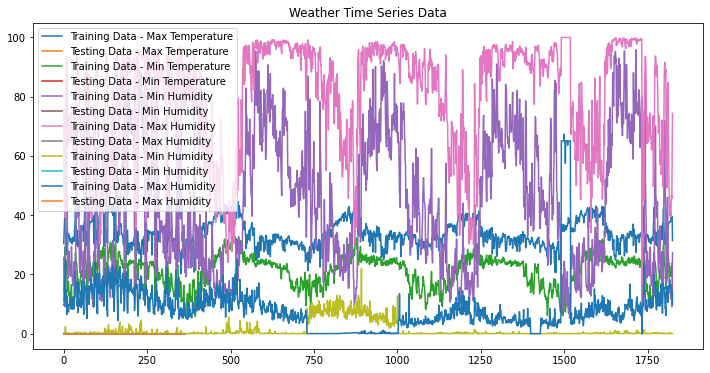

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24216D+00    |proj g|=  4.67952D-03

At iterate    5    f=  2.24086D+00    |proj g|=  3.11977D-02

At iterate   10    f=  2.23951D+00    |proj g|=  8.08318D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   8.083D-06   2.240D+00
  F =   2.2395148941322929     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for temp_min (⁰C): 21.60
RUNNING THE L-BFGS-B 

 This problem is unconstrained.



At iterate   10    f=  2.28280D+00    |proj g|=  1.33440D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   2.518D-06   2.283D+00
  F =   2.2827976261223224     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for temp_max (⁰C): 34.19
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10



 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58565D+00    |proj g|=  7.60806D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   6.860D-05   3.586D+00
  F =   3.5856170272392758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for humidity_min (%): 44.51


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49205D+00    |proj g|=  6.67257D-03

At iterate    5    f=  3.49201D+00    |proj g|=  3.08401D-03

At iterate   10    f=  3.49187D+00    |proj g|=  3.41099D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     15      1     0     0   3.085D-05   3.492D+00
  F =   3.4918668945695384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for humidity_max (%): 78.24
RUNNING THE L-BFGS

 This problem is unconstrained.



At iterate    5    f=  1.41925D+00    |proj g|=  1.67009D-02

At iterate   10    f=  1.41838D+00    |proj g|=  2.93212D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   4.991D-06   1.418D+00
  F =   1.4183697911607469     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for wind_speed_min (Kmph): 0.67
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56193D+00    |proj g|=  7.83258D-03


 This problem is unconstrained.



At iterate    5    f=  2.56189D+00    |proj g|=  9.61060D-05

At iterate   10    f=  2.56189D+00    |proj g|=  1.17023D-03

At iterate   15    f=  2.56189D+00    |proj g|=  1.57887D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     17      1     0     0   1.579D-06   2.562D+00
  F =   2.5618899970481870     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for wind_speed_max (Kmph): 13.75


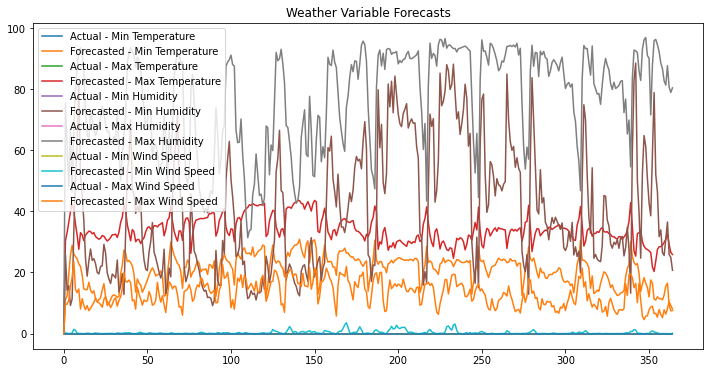

In [108]:
# Loading Weather Data
#df = pd.read_csv("../Weather_Data/df.csv")

df_adilabad = df[df['District'] == 'Adilabad']

df_adilabad['Date'] = pd.to_datetime(df_adilabad['Date'])
df_adilabad.set_index('Date', inplace=True)

# Splitting Data into Training and Testing
train_data = df_adilabad['2018-01-01':'2022-12-31'].reset_index(drop=True)
test_data = df_adilabad['2023-01-01':].reset_index(drop=True)

# Visualizing Data
plt.figure(figsize=(12,6))
plt.plot(train_data['temp_max (⁰C)'], label='Training Data - Max Temperature')
plt.plot(test_data['temp_max (⁰C)'], label='Testing Data - Max Temperature')
plt.plot(train_data['temp_min (⁰C)'], label='Training Data - Min Temperature')
plt.plot(test_data['temp_min (⁰C)'], label='Testing Data - Min Temperature')
plt.plot(train_data['humidity_min (%)'], label='Training Data - Min Humidity')
plt.plot(test_data['humidity_min (%)'], label='Testing Data - Min Humidity')
plt.plot(train_data['humidity_max (%)'], label='Training Data - Max Humidity')
plt.plot(test_data['humidity_max (%)'], label='Testing Data - Max Humidity')
plt.plot(train_data['wind_speed_min (Kmph)'], label='Training Data - Min Humidity')
plt.plot(test_data['wind_speed_min (Kmph)'], label='Testing Data - Min Humidity')
plt.plot(train_data['wind_speed_max (Kmph)'], label='Training Data - Max Humidity')
plt.plot(test_data['wind_speed_max (Kmph)'], label='Testing Data - Max Humidity')
plt.title('Weather Time Series Data')
plt.legend()
plt.show()

# # Determining Seasonality and Trend for Max Temperature
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['temp_max (⁰C)'], ax=ax[0], lags=40)
# plot_pacf(train_data['temp_max (⁰C)'], ax=ax[1], lags=40)
# plt.show()

# # Determining Seasonality and Trend for Min Temperature
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['temp_min (⁰C)'], ax=ax[0], lags=40)
# plot_pacf(train_data['temp_min (⁰C)'], ax=ax[1], lags=40)
# plt.show()

# # Determining Seasonality and Trend for Min Humidity
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['humidity_min (%)'], ax=ax[0], lags=40)
# plot_pacf(train_data['humidity_min (%)'], ax=ax[1], lags=40)
# plt.show()

# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['Humidity_max (%)'], ax=ax[0], lags=40)
# plot_pacf(train_data['Humidity_max (%)'], ax=ax[1], lags=40)
# plt.show()

temp_min_predictions = fit_and_forecast('temp_min (⁰C)', train_data, test_data)
temp_max_predictions = fit_and_forecast('temp_max (⁰C)', train_data, test_data)
humidity_min_predictions = fit_and_forecast('humidity_min (%)', train_data, test_data)
humidity_max_predictions = fit_and_forecast('humidity_max (%)', train_data, test_data)
wind_speed_min_predictions = fit_and_forecast('wind_speed_min (Kmph)', train_data, test_data)
wind_speed_max_predictions = fit_and_forecast('wind_speed_max (Kmph)', train_data, test_data)

# plt.figure(figsize=(12,6))
# plt.plot(test_data.index, test_data['temp_min (⁰C)'], label='Actual - Min Temperature')
# plt.plot(test_data.index, temp_min_predictions, label='Forecasted - Min Temperature')
# plt.plot(test_data.index, test_data['temp_max (⁰C)'], label='Actual - Max Temperature')
# plt.plot(test_data.index, temp_max_predictions, label='Forecasted - Max Temperature')
# plt.plot(test_data.index, test_data['humidity_min (%)'], label='Actual - Min Humidity')
# plt.plot(test_data.index, humidity_min_predictions, label='Forecasted - Min Humidity')
# plt.plot(test_data.index, test_data['humidity_max (%)'], label='Actual - Max Humidity')
# plt.plot(test_data.index, humidity_max_predictions, label='Forecasted - Max Humidity')
# plt.plot(test_data.index, test_data['wind_speed_min (Kmph)'], label='Actual - Min Wind Speed')
# plt.plot(test_data.index, wind_speed_min_predictions, label='Forecasted - Min Wind Speed')
# plt.plot(test_data.index, test_data['wind_speed_max (Kmph)'], label='Actual - Max Wind Speed')
# plt.plot(test_data.index, wind_speed_max_predictions, label='Forecasted - Max Wind Speed')
# plt.title('Weather Variable Forecasts')
# plt.legend()
# plt.show()

start_date='2023-01-01'
end_date= '2023-12-31'
predictions_df_adilabad = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': 'Adilabad', 'temp_min (⁰C)': temp_min_predictions,'temp_max (⁰C)':temp_max_predictions,'humidity_min (%)':humidity_min_predictions,'humidity_max (%)':humidity_max_predictions, 
                               'wind_speed_min (Kmph)':wind_speed_min_predictions,'wind_speed_max (Kmph)':wind_speed_max_predictions})
predictions_df_adilabad.set_index('Date', inplace=True)


In [109]:
predictions_df_adilabad = predictions_df_adilabad.reset_index()
predictions_df_adilabad


,Date,District,temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,2023-01-01,Adilabad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-01-02,Adilabad,11.199995,30.436811,25.720988,75.483143,0.250000,9.627759
2,2023-01-03,Adilabad,12.319795,33.057700,14.234923,61.152354,0.109764,9.605300
3,2023-01-04,Adilabad,19.462281,36.441182,15.674186,48.062585,0.000003,10.917201
4,2023-01-05,Adilabad,25.624822,39.832842,9.222777,66.739904,0.046738,15.574990
...,...,...,...,...,...,...,...,...
360,2023-12-27,Adilabad,15.569967,30.877897,30.957609,81.303268,-0.003305,6.377089
361,2023-12-28,Adilabad,16.522757,32.591500,36.517553,87.661017,0.005781,8.182446
362,2023-12-29,Adilabad,9.276065,29.183336,25.846305,80.593944,-0.014899,10.496819
363,2023-12-30,Adilabad,7.450598,26.529912,24.926882,78.909145,-0.034962,9.166567


In [120]:
predictions_df_adilabad.to_csv('adilabad_forecasted.csv', index=False)

# Nizamabad

In [113]:
df = df23.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10950 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   10950 non-null  datetime64[ns]
 1   District               10950 non-null  object        
 2   temp_min (⁰C)          10950 non-null  float64       
 3   temp_max (⁰C)          10950 non-null  float64       
 4   humidity_min (%)       10950 non-null  float64       
 5   humidity_max (%)       10950 non-null  float64       
 6   wind_speed_min (Kmph)  10950 non-null  float64       
 7   wind_speed_max (Kmph)  10950 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 769.9+ KB


In [114]:
df

,Date,District,temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,2018-01-01,Adilabad,11.200000,30.436842,25.721053,75.484211,0.250000,9.627778
1,2018-01-02,Adilabad,12.426316,33.621053,13.842105,57.284211,0.000000,9.600000
2,2018-01-03,Adilabad,20.131579,37.047368,15.736842,45.573684,0.000000,11.227778
3,2018-01-04,Adilabad,26.147368,40.431579,9.000000,72.452632,0.083333,16.600000
4,2018-01-05,Adilabad,29.168421,43.084211,11.384211,39.200000,0.266667,18.727778
...,...,...,...,...,...,...,...,...
1820,2023-12-27,Warangal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1821,2023-12-28,Warangal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1822,2023-12-29,Warangal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1823,2023-12-30,Warangal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_36203/903656821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nizamabad['Date'] = pd.to_datetime(df_nizamabad['Date'])


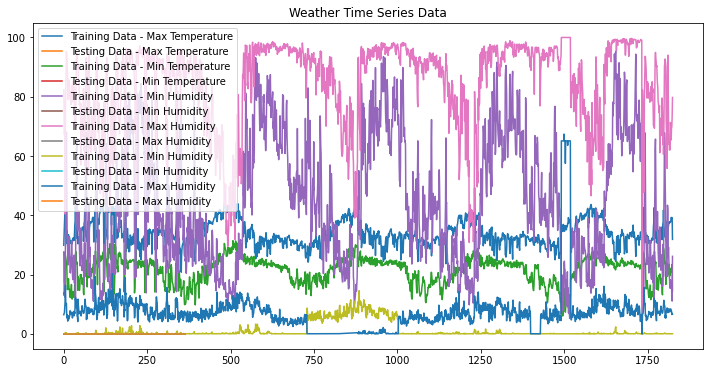

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10573D+00    |proj g|=  1.83714D-03

At iterate    5    f=  2.10541D+00    |proj g|=  1.67941D-02


 This problem is unconstrained.



At iterate   10    f=  2.10453D+00    |proj g|=  1.78933D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   2.905D-05   2.105D+00
  F =   2.1045330535392095     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for temp_min (⁰C): 22.08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22946D+00    |proj g|=  1.28130D-03


 This problem is unconstrained.



At iterate    5    f=  2.22946D+00    |proj g|=  3.09969D-04

At iterate   10    f=  2.22946D+00    |proj g|=  5.87002D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   1.082D-05   2.229D+00
  F =   2.2294565289083854     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for temp_max (⁰C): 34.66
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58164D+00    |proj g|=  3.90666D-03

At iterate    5    f

 This problem is unconstrained.



At iterate   10    f=  3.58159D+00    |proj g|=  7.78044D-04

At iterate   15    f=  3.58159D+00    |proj g|=  3.05434D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   6.707D-06   3.582D+00
  F =   3.5815881412279338     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for humidity_min (%): 43.96
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35579D+00    |proj g|=  1.97009D-03


 This problem is unconstrained.



At iterate    5    f=  3.35578D+00    |proj g|=  2.58267D-03

At iterate   10    f=  3.35571D+00    |proj g|=  5.97452D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   7.326D-06   3.356D+00
  F =   3.3557057887153037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for humidity_max (%): 82.51
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.35292D-01    |proj g|=  4.07186D-02

At iterate    5  

 This problem is unconstrained.



At iterate   10    f=  9.34454D-01    |proj g|=  6.10127D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   6.406D-06   9.345D-01
  F =  0.93445406235865247     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for wind_speed_min (Kmph): 0.36
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37512D+00    |proj g|=  1.87281D-03


 This problem is unconstrained.



At iterate    5    f=  2.37512D+00    |proj g|=  8.77108D-05

At iterate   10    f=  2.37511D+00    |proj g|=  2.63125D-03

At iterate   15    f=  2.37498D+00    |proj g|=  2.25832D-03

At iterate   20    f=  2.37495D+00    |proj g|=  1.05799D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   1.742D-06   2.375D+00
  F =   2.3749513180642978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for wind_speed_max (Kmph): 8.86


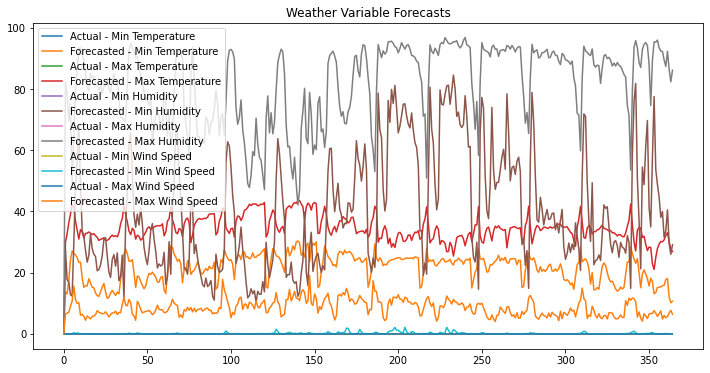

In [115]:
df_nizamabad = df[df['District'] == 'Nizamabad']

df_nizamabad['Date'] = pd.to_datetime(df_nizamabad['Date'])
df_nizamabad.set_index('Date', inplace=True)

# Splitting Data into Training and Testing
train_data = df_nizamabad['2018-01-01':'2022-12-31'].reset_index(drop=True)
test_data = df_nizamabad['2023-01-01':].reset_index(drop=True)

# Visualizing Data
plt.figure(figsize=(12,6))
plt.plot(train_data['temp_max (⁰C)'], label='Training Data - Max Temperature')
plt.plot(test_data['temp_max (⁰C)'], label='Testing Data - Max Temperature')
plt.plot(train_data['temp_min (⁰C)'], label='Training Data - Min Temperature')
plt.plot(test_data['temp_min (⁰C)'], label='Testing Data - Min Temperature')
plt.plot(train_data['humidity_min (%)'], label='Training Data - Min Humidity')
plt.plot(test_data['humidity_min (%)'], label='Testing Data - Min Humidity')
plt.plot(train_data['humidity_max (%)'], label='Training Data - Max Humidity')
plt.plot(test_data['humidity_max (%)'], label='Testing Data - Max Humidity')
plt.plot(train_data['wind_speed_min (Kmph)'], label='Training Data - Min Humidity')
plt.plot(test_data['wind_speed_min (Kmph)'], label='Testing Data - Min Humidity')
plt.plot(train_data['wind_speed_max (Kmph)'], label='Training Data - Max Humidity')
plt.plot(test_data['wind_speed_max (Kmph)'], label='Testing Data - Max Humidity')
plt.title('Weather Time Series Data')
plt.legend()
plt.show()

# # Determining Seasonality and Trend for Max Temperature
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['temp_max (⁰C)'], ax=ax[0], lags=40)
# plot_pacf(train_data['temp_max (⁰C)'], ax=ax[1], lags=40)
# plt.show()

# # Determining Seasonality and Trend for Min Temperature
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['temp_min (⁰C)'], ax=ax[0], lags=40)
# plot_pacf(train_data['temp_min (⁰C)'], ax=ax[1], lags=40)
# plt.show()

# # Determining Seasonality and Trend for Min Humidity
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['humidity_min (%)'], ax=ax[0], lags=40)
# plot_pacf(train_data['humidity_min (%)'], ax=ax[1], lags=40)
# plt.show()

# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['Humidity_max (%)'], ax=ax[0], lags=40)
# plot_pacf(train_data['Humidity_max (%)'], ax=ax[1], lags=40)
# plt.show()

temp_min_predictions = fit_and_forecast('temp_min (⁰C)', train_data, test_data)
temp_max_predictions = fit_and_forecast('temp_max (⁰C)', train_data, test_data)
humidity_min_predictions = fit_and_forecast('humidity_min (%)', train_data, test_data)
humidity_max_predictions = fit_and_forecast('humidity_max (%)', train_data, test_data)
wind_speed_min_predictions = fit_and_forecast('wind_speed_min (Kmph)', train_data, test_data)
wind_speed_max_predictions = fit_and_forecast('wind_speed_max (Kmph)', train_data, test_data)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['temp_min (⁰C)'], label='Actual - Min Temperature')
plt.plot(test_data.index, temp_min_predictions, label='Forecasted - Min Temperature')
plt.plot(test_data.index, test_data['temp_max (⁰C)'], label='Actual - Max Temperature')
plt.plot(test_data.index, temp_max_predictions, label='Forecasted - Max Temperature')
plt.plot(test_data.index, test_data['humidity_min (%)'], label='Actual - Min Humidity')
plt.plot(test_data.index, humidity_min_predictions, label='Forecasted - Min Humidity')
plt.plot(test_data.index, test_data['humidity_max (%)'], label='Actual - Max Humidity')
plt.plot(test_data.index, humidity_max_predictions, label='Forecasted - Max Humidity')
plt.plot(test_data.index, test_data['wind_speed_min (Kmph)'], label='Actual - Min Wind Speed')
plt.plot(test_data.index, wind_speed_min_predictions, label='Forecasted - Min Wind Speed')
plt.plot(test_data.index, test_data['wind_speed_max (Kmph)'], label='Actual - Max Wind Speed')
plt.plot(test_data.index, wind_speed_max_predictions, label='Forecasted - Max Wind Speed')
plt.title('Weather Variable Forecasts')
plt.legend()
plt.show()

start_date='2023-01-01'
end_date= '2023-12-31'
predictions_df_nizamabad = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': 'Nizamabad', 'temp_min (⁰C)': temp_min_predictions,'temp_max (⁰C)':temp_max_predictions,'humidity_min (%)':humidity_min_predictions,'humidity_max (%)':humidity_max_predictions, 
                               'wind_speed_min (Kmph)':wind_speed_min_predictions,'wind_speed_max (Kmph)':wind_speed_max_predictions})
predictions_df_nizamabad.set_index('Date', inplace=True)

In [116]:
predictions_df_nizamabad = predictions_df_nizamabad.reset_index()
predictions_df_nizamabad

,Date,District,temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,2023-01-01,Nizamabad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-01-02,Nizamabad,13.684610,29.876897,27.620448,82.278458,0.000000,6.428199
2,2023-01-03,Nizamabad,13.052235,32.615058,17.722269,78.246537,0.000000,6.767507
3,2023-01-04,Nizamabad,17.357997,36.224927,16.925579,69.472532,0.000000,7.009014
4,2023-01-05,Nizamabad,24.093846,39.064827,12.792408,75.049154,0.005582,8.996654
...,...,...,...,...,...,...,...,...
360,2023-12-27,Nizamabad,17.691550,32.134122,33.644341,87.380738,0.080972,5.226309
361,2023-12-28,Nizamabad,18.075753,33.040352,40.498979,92.295016,0.037880,5.714601
362,2023-12-29,Nizamabad,11.980413,30.139225,29.468593,86.446358,0.017139,6.799229
363,2023-12-30,Nizamabad,10.148387,27.571245,25.977324,82.334221,0.011828,7.654465


In [119]:
predictions_df_nizamabad.to_csv('nizamabad_forecasted.csv', index=False)

# Khammam

In [121]:
df = df23.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10950 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   10950 non-null  datetime64[ns]
 1   District               10950 non-null  object        
 2   temp_min (⁰C)          10950 non-null  float64       
 3   temp_max (⁰C)          10950 non-null  float64       
 4   humidity_min (%)       10950 non-null  float64       
 5   humidity_max (%)       10950 non-null  float64       
 6   wind_speed_min (Kmph)  10950 non-null  float64       
 7   wind_speed_max (Kmph)  10950 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 769.9+ KB


/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_36203/700739304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_khammam['Date'] = pd.to_datetime(df_khammam['Date'])


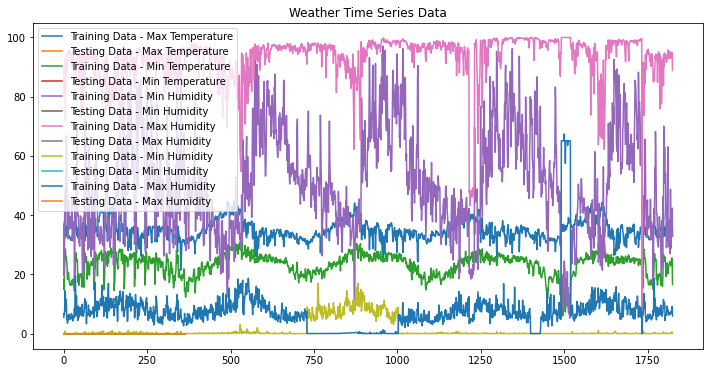

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99006D+00    |proj g|=  3.27350D-03

At iterate    5    f=  1.98950D+00    |proj g|=  1.58435D-02

At iterate   10    f=  1.98927D+00    |proj g|=  2.50817D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     16      1     0     0   2.508D-06   1.989D+00
  F =   1.9892665267661729     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for temp_min (⁰C): 23.25
RUNNING THE L-BFGS-B 

 This problem is unconstrained.



At iterate    5    f=  2.18125D+00    |proj g|=  1.68456D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      7      1     0     0   1.685D-05   2.181D+00
  F =   2.1812461190172625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for temp_max (⁰C): 35.21
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58560D+00    |proj g|=  3.22299D-03

At iterate    5    f=  3.58559D+00    |proj g|=  3.19835D-04

           * * *

Ti

 This problem is unconstrained.


Root Mean Squared Error for humidity_min (%): 49.11
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03338D+00    |proj g|=  3.42160D-02


 This problem is unconstrained.



At iterate    5    f=  3.03280D+00    |proj g|=  1.95442D-03

At iterate   10    f=  3.03255D+00    |proj g|=  1.31471D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   3.291D-06   3.032D+00
  F =   3.0324343252378387     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for humidity_max (%): 90.32


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20461D+00    |proj g|=  1.26465D-02

At iterate    5    f=  1.20452D+00    |proj g|=  1.86035D-03

At iterate   10    f=  1.20368D+00    |proj g|=  4.20073D-02

At iterate   15    f=  1.20012D+00    |proj g|=  1.42817D-02

At iterate   20    f=  1.19975D+00    |proj g|=  1.32223D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     24      1     0     0   1.322D-06   1.200D+00
  F =   1.1997486978648602     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.46712D+00    |proj g|=  2.33676D-04

At iterate   10    f=  2.46710D+00    |proj g|=  2.26175D-03

At iterate   15    f=  2.46709D+00    |proj g|=  1.60161D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   1.602D-06   2.467D+00
  F =   2.4670858427286504     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for wind_speed_max (Kmph): 8.48


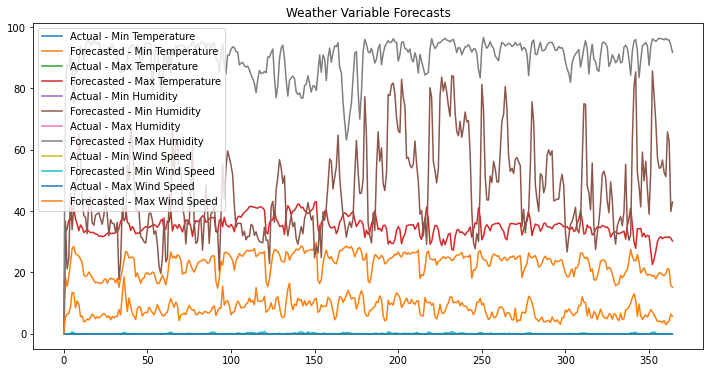

In [122]:
df_khammam = df[df['District'] == 'Khammam']

df_khammam['Date'] = pd.to_datetime(df_khammam['Date'])
df_khammam.set_index('Date', inplace=True)

# Splitting Data into Training and Testing
train_data = df_khammam['2018-01-01':'2022-12-31'].reset_index(drop=True)
test_data = df_khammam['2023-01-01':].reset_index(drop=True)

# Visualizing Data
plt.figure(figsize=(12,6))
plt.plot(train_data['temp_max (⁰C)'], label='Training Data - Max Temperature')
plt.plot(test_data['temp_max (⁰C)'], label='Testing Data - Max Temperature')
plt.plot(train_data['temp_min (⁰C)'], label='Training Data - Min Temperature')
plt.plot(test_data['temp_min (⁰C)'], label='Testing Data - Min Temperature')
plt.plot(train_data['humidity_min (%)'], label='Training Data - Min Humidity')
plt.plot(test_data['humidity_min (%)'], label='Testing Data - Min Humidity')
plt.plot(train_data['humidity_max (%)'], label='Training Data - Max Humidity')
plt.plot(test_data['humidity_max (%)'], label='Testing Data - Max Humidity')
plt.plot(train_data['wind_speed_min (Kmph)'], label='Training Data - Min Humidity')
plt.plot(test_data['wind_speed_min (Kmph)'], label='Testing Data - Min Humidity')
plt.plot(train_data['wind_speed_max (Kmph)'], label='Training Data - Max Humidity')
plt.plot(test_data['wind_speed_max (Kmph)'], label='Testing Data - Max Humidity')
plt.title('Weather Time Series Data')
plt.legend()
plt.show()

# # Determining Seasonality and Trend for Max Temperature
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['temp_max (⁰C)'], ax=ax[0], lags=40)
# plot_pacf(train_data['temp_max (⁰C)'], ax=ax[1], lags=40)
# plt.show()

# # Determining Seasonality and Trend for Min Temperature
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['temp_min (⁰C)'], ax=ax[0], lags=40)
# plot_pacf(train_data['temp_min (⁰C)'], ax=ax[1], lags=40)
# plt.show()

# # Determining Seasonality and Trend for Min Humidity
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['humidity_min (%)'], ax=ax[0], lags=40)
# plot_pacf(train_data['humidity_min (%)'], ax=ax[1], lags=40)
# plt.show()

# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['Humidity_max (%)'], ax=ax[0], lags=40)
# plot_pacf(train_data['Humidity_max (%)'], ax=ax[1], lags=40)
# plt.show()

temp_min_predictions = fit_and_forecast('temp_min (⁰C)', train_data, test_data)
temp_max_predictions = fit_and_forecast('temp_max (⁰C)', train_data, test_data)
humidity_min_predictions = fit_and_forecast('humidity_min (%)', train_data, test_data)
humidity_max_predictions = fit_and_forecast('humidity_max (%)', train_data, test_data)
wind_speed_min_predictions = fit_and_forecast('wind_speed_min (Kmph)', train_data, test_data)
wind_speed_max_predictions = fit_and_forecast('wind_speed_max (Kmph)', train_data, test_data)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['temp_min (⁰C)'], label='Actual - Min Temperature')
plt.plot(test_data.index, temp_min_predictions, label='Forecasted - Min Temperature')
plt.plot(test_data.index, test_data['temp_max (⁰C)'], label='Actual - Max Temperature')
plt.plot(test_data.index, temp_max_predictions, label='Forecasted - Max Temperature')
plt.plot(test_data.index, test_data['humidity_min (%)'], label='Actual - Min Humidity')
plt.plot(test_data.index, humidity_min_predictions, label='Forecasted - Min Humidity')
plt.plot(test_data.index, test_data['humidity_max (%)'], label='Actual - Max Humidity')
plt.plot(test_data.index, humidity_max_predictions, label='Forecasted - Max Humidity')
plt.plot(test_data.index, test_data['wind_speed_min (Kmph)'], label='Actual - Min Wind Speed')
plt.plot(test_data.index, wind_speed_min_predictions, label='Forecasted - Min Wind Speed')
plt.plot(test_data.index, test_data['wind_speed_max (Kmph)'], label='Actual - Max Wind Speed')
plt.plot(test_data.index, wind_speed_max_predictions, label='Forecasted - Max Wind Speed')
plt.title('Weather Variable Forecasts')
plt.legend()
plt.show()

start_date='2023-01-01'
end_date= '2023-12-31'
predictions_df_khammam = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': 'Khammam', 'temp_min (⁰C)': temp_min_predictions,'temp_max (⁰C)':temp_max_predictions,'humidity_min (%)':humidity_min_predictions,'humidity_max (%)':humidity_max_predictions, 
                               'wind_speed_min (Kmph)':wind_speed_min_predictions,'wind_speed_max (Kmph)':wind_speed_max_predictions})
predictions_df_khammam.set_index('Date', inplace=True)

In [123]:
predictions_df_khammam = predictions_df_khammam.reset_index()
predictions_df_khammam

,Date,District,temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,2023-01-01,Khammam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-01-02,Khammam,18.302620,33.076280,36.728654,80.894190,0.000000,5.418911
2,2023-01-03,Khammam,15.474609,34.334907,21.204399,87.971717,0.000000,6.567632
3,2023-01-04,Khammam,18.409853,37.021596,24.494934,86.808877,0.000000,6.534037
4,2023-01-05,Khammam,23.237755,37.140429,45.795652,90.879779,0.145690,8.659305
...,...,...,...,...,...,...,...,...
360,2023-12-27,Khammam,19.551777,31.581758,51.261950,96.333303,0.000998,2.950893
361,2023-12-28,Khammam,21.318075,31.362867,65.829932,95.855072,-0.005666,3.758997
362,2023-12-29,Khammam,20.959816,31.608680,62.808837,95.790171,-0.041124,4.146352
363,2023-12-30,Khammam,15.773179,31.217228,39.902595,94.065207,0.023290,6.415055


In [124]:
predictions_df_khammam.to_csv('khammam_forecasted.csv', index=False)

# Karimnagar

In [125]:
df = df23.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10950 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   10950 non-null  datetime64[ns]
 1   District               10950 non-null  object        
 2   temp_min (⁰C)          10950 non-null  float64       
 3   temp_max (⁰C)          10950 non-null  float64       
 4   humidity_min (%)       10950 non-null  float64       
 5   humidity_max (%)       10950 non-null  float64       
 6   wind_speed_min (Kmph)  10950 non-null  float64       
 7   wind_speed_max (Kmph)  10950 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 769.9+ KB


/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_36203/4180259313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_karimnagar['Date'] = pd.to_datetime(df_karimnagar['Date'])


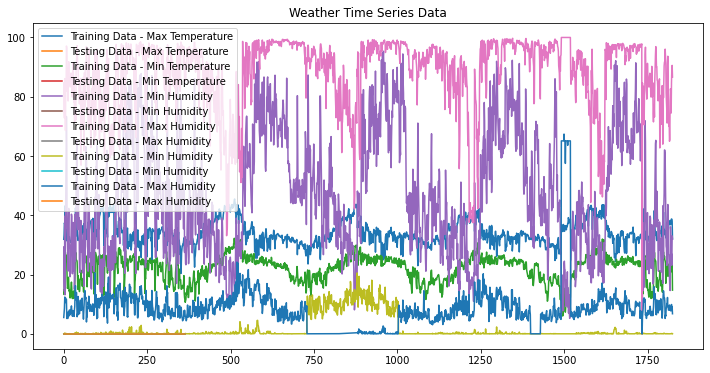

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11205D+00    |proj g|=  2.60040D-03

At iterate    5    f=  2.11179D+00    |proj g|=  1.50419D-02

At iterate   10    f=  2.11108D+00    |proj g|=  7.08446D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   7.464D-06   2.111D+00
  F =   2.1110777659923081     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for temp_min (⁰C): 22.33
RUNNING THE L-BFGS-B 

 This problem is unconstrained.



At iterate    5    f=  2.22878D+00    |proj g|=  3.64263D-04

At iterate   10    f=  2.22877D+00    |proj g|=  8.01482D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   1.277D-06   2.229D+00
  F =   2.2287692382607580     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for temp_max (⁰C): 34.68
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66598D+00    |proj g|=  1.01649D-03


 This problem is unconstrained.



At iterate    5    f=  3.66597D+00    |proj g|=  1.03028D-03

At iterate   10    f=  3.66587D+00    |proj g|=  1.41746D-02

At iterate   15    f=  3.66542D+00    |proj g|=  1.75659D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   1.189D-05   3.665D+00
  F =   3.6653554037361404     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for humidity_min (%): 47.02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate    5    f=  3.32144D+00    |proj g|=  1.59595D-04

At iterate   10    f=  3.32144D+00    |proj g|=  8.81051D-04

At iterate   15    f=  3.32126D+00    |proj g|=  3.77341D-03

At iterate   20    f=  3.32123D+00    |proj g|=  3.58349D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     28      1     0     0   3.583D-06   3.321D+00
  F =   3.3212274269086937     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for humidity_max (%): 86.37
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0   

 This problem is unconstrained.



At iterate    5    f=  1.44650D+00    |proj g|=  4.94563D-03

At iterate   10    f=  1.44407D+00    |proj g|=  2.12147D-02

At iterate   15    f=  1.44366D+00    |proj g|=  3.79955D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   5.295D-07   1.444D+00
  F =   1.4436636925973210     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for wind_speed_min (Kmph): 0.36
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  2.47908D+00    |proj g|=  3.71210D-04

At iterate   10    f=  2.47904D+00    |proj g|=  4.72607D-03

At iterate   15    f=  2.47901D+00    |proj g|=  6.98286D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   6.983D-06   2.479D+00
  F =   2.4790134704913629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for wind_speed_max (Kmph): 10.16


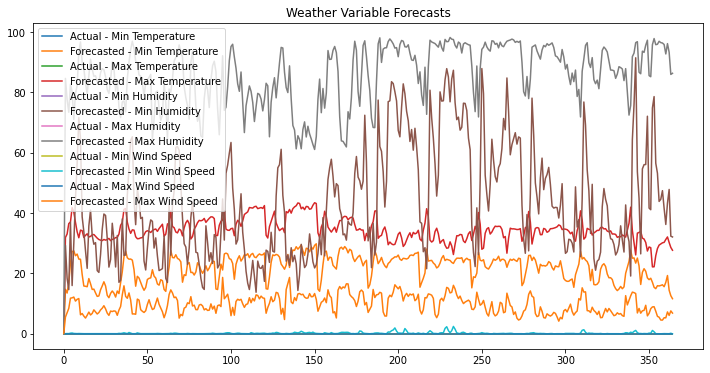

In [129]:
df_karimnagar = df[df['District'] == 'Karimnagar']

df_karimnagar['Date'] = pd.to_datetime(df_karimnagar['Date'])
df_karimnagar.set_index('Date', inplace=True)

# Splitting Data into Training and Testing
train_data = df_karimnagar['2018-01-01':'2022-12-31'].reset_index(drop=True)
test_data = df_karimnagar['2023-01-01':].reset_index(drop=True)

# Visualizing Data
plt.figure(figsize=(12,6))
plt.plot(train_data['temp_max (⁰C)'], label='Training Data - Max Temperature')
plt.plot(test_data['temp_max (⁰C)'], label='Testing Data - Max Temperature')
plt.plot(train_data['temp_min (⁰C)'], label='Training Data - Min Temperature')
plt.plot(test_data['temp_min (⁰C)'], label='Testing Data - Min Temperature')
plt.plot(train_data['humidity_min (%)'], label='Training Data - Min Humidity')
plt.plot(test_data['humidity_min (%)'], label='Testing Data - Min Humidity')
plt.plot(train_data['humidity_max (%)'], label='Training Data - Max Humidity')
plt.plot(test_data['humidity_max (%)'], label='Testing Data - Max Humidity')
plt.plot(train_data['wind_speed_min (Kmph)'], label='Training Data - Min Humidity')
plt.plot(test_data['wind_speed_min (Kmph)'], label='Testing Data - Min Humidity')
plt.plot(train_data['wind_speed_max (Kmph)'], label='Training Data - Max Humidity')
plt.plot(test_data['wind_speed_max (Kmph)'], label='Testing Data - Max Humidity')
plt.title('Weather Time Series Data')
plt.legend()
plt.show()

# # Determining Seasonality and Trend for Max Temperature
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['temp_max (⁰C)'], ax=ax[0], lags=40)
# plot_pacf(train_data['temp_max (⁰C)'], ax=ax[1], lags=40)
# plt.show()

# # Determining Seasonality and Trend for Min Temperature
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['temp_min (⁰C)'], ax=ax[0], lags=40)
# plot_pacf(train_data['temp_min (⁰C)'], ax=ax[1], lags=40)
# plt.show()

# # Determining Seasonality and Trend for Min Humidity
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['humidity_min (%)'], ax=ax[0], lags=40)
# plot_pacf(train_data['humidity_min (%)'], ax=ax[1], lags=40)
# plt.show()

# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['Humidity_max (%)'], ax=ax[0], lags=40)
# plot_pacf(train_data['Humidity_max (%)'], ax=ax[1], lags=40)
# plt.show()

temp_min_predictions = fit_and_forecast('temp_min (⁰C)', train_data, test_data)
temp_max_predictions = fit_and_forecast('temp_max (⁰C)', train_data, test_data)
humidity_min_predictions = fit_and_forecast('humidity_min (%)', train_data, test_data)
humidity_max_predictions = fit_and_forecast('humidity_max (%)', train_data, test_data)
wind_speed_min_predictions = fit_and_forecast('wind_speed_min (Kmph)', train_data, test_data)
wind_speed_max_predictions = fit_and_forecast('wind_speed_max (Kmph)', train_data, test_data)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['temp_min (⁰C)'], label='Actual - Min Temperature')
plt.plot(test_data.index, temp_min_predictions, label='Forecasted - Min Temperature')
plt.plot(test_data.index, test_data['temp_max (⁰C)'], label='Actual - Max Temperature')
plt.plot(test_data.index, temp_max_predictions, label='Forecasted - Max Temperature')
plt.plot(test_data.index, test_data['humidity_min (%)'], label='Actual - Min Humidity')
plt.plot(test_data.index, humidity_min_predictions, label='Forecasted - Min Humidity')
plt.plot(test_data.index, test_data['humidity_max (%)'], label='Actual - Max Humidity')
plt.plot(test_data.index, humidity_max_predictions, label='Forecasted - Max Humidity')
plt.plot(test_data.index, test_data['wind_speed_min (Kmph)'], label='Actual - Min Wind Speed')
plt.plot(test_data.index, wind_speed_min_predictions, label='Forecasted - Min Wind Speed')
plt.plot(test_data.index, test_data['wind_speed_max (Kmph)'], label='Actual - Max Wind Speed')
plt.plot(test_data.index, wind_speed_max_predictions, label='Forecasted - Max Wind Speed')
plt.title('Weather Variable Forecasts')
plt.legend()
plt.show()

start_date='2023-01-01'
end_date= '2023-12-31'
predictions_df_karimnagar = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': 'Karimnagar', 'temp_min (⁰C)': temp_min_predictions,'temp_max (⁰C)':temp_max_predictions,'humidity_min (%)':humidity_min_predictions,'humidity_max (%)':humidity_max_predictions, 
                               'wind_speed_min (Kmph)':wind_speed_min_predictions,'wind_speed_max (Kmph)':wind_speed_max_predictions})
predictions_df_karimnagar.set_index('Date', inplace=True)

In [130]:
predictions_df_karimnagar = predictions_df_karimnagar.reset_index()
predictions_df_karimnagar

,Date,District,temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,2023-01-01,Karimnagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-01-02,Karimnagar,14.715992,31.883962,29.283720,84.634969,0.000000,5.495992
2,2023-01-03,Karimnagar,13.463593,33.047905,18.412122,77.638427,0.037796,6.904400
3,2023-01-04,Karimnagar,16.876153,36.503266,14.594751,73.424713,0.018204,8.392154
4,2023-01-05,Karimnagar,23.385408,37.031550,37.002407,82.759808,0.161984,11.775870
...,...,...,...,...,...,...,...,...
360,2023-12-27,Karimnagar,17.018150,31.234284,36.213432,92.753123,0.018408,5.250068
361,2023-12-28,Karimnagar,19.281684,32.075008,43.279385,96.177326,0.036227,7.212980
362,2023-12-29,Karimnagar,14.399132,30.229345,47.825273,93.308237,-0.012613,6.055374
363,2023-12-30,Karimnagar,12.592405,28.598299,32.336871,85.959723,0.137463,7.560396


In [131]:
predictions_df_karimnagar.to_csv('karimnagar_forecasted.csv', index=False)

# Warangal

In [132]:
df = df23.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10950 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   10950 non-null  datetime64[ns]
 1   District               10950 non-null  object        
 2   temp_min (⁰C)          10950 non-null  float64       
 3   temp_max (⁰C)          10950 non-null  float64       
 4   humidity_min (%)       10950 non-null  float64       
 5   humidity_max (%)       10950 non-null  float64       
 6   wind_speed_min (Kmph)  10950 non-null  float64       
 7   wind_speed_max (Kmph)  10950 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 769.9+ KB


/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_36203/4013946480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_warangal['Date'] = pd.to_datetime(df_warangal['Date'])


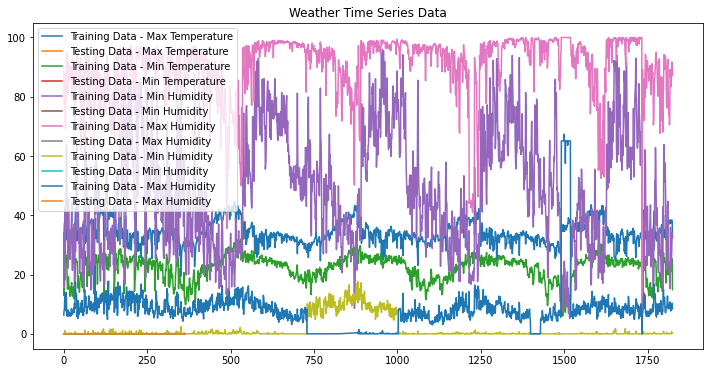

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09592D+00    |proj g|=  8.25494D-03

At iterate    5    f=  2.09588D+00    |proj g|=  2.02319D-03

At iterate   10    f=  2.09555D+00    |proj g|=  1.27690D-02


 This problem is unconstrained.



At iterate   15    f=  2.09490D+00    |proj g|=  4.74318D-03

At iterate   20    f=  2.09389D+00    |proj g|=  1.40546D-02

At iterate   25    f=  2.09324D+00    |proj g|=  7.75360D-04

At iterate   30    f=  2.09314D+00    |proj g|=  7.08983D-04

At iterate   35    f=  2.09312D+00    |proj g|=  2.06878D-04

At iterate   40    f=  2.09312D+00    |proj g|=  1.42712D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     49      1     0     0   4.964D-05   2.093D+00
  F =   2.0931153342569462     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for temp_min (⁰C): 22.33


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20731D+00    |proj g|=  9.76230D-03

At iterate    5    f=  2.20726D+00    |proj g|=  1.86901D-03

At iterate   10    f=  2.20721D+00    |proj g|=  3.73048D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   8.288D-06   2.207D+00
  F =   2.2072050864637602     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for temp_max (⁰C): 34.34
RUNNING THE L-BFGS-B 

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65477D+00    |proj g|=  1.34334D-03

At iterate    5    f=  3.65477D+00    |proj g|=  3.52159D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   1.862D-05   3.655D+00
  F =   3.6547697559217203     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for humidity_min (%): 46.99
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =      

 This problem is unconstrained.



At iterate    5    f=  3.25026D+00    |proj g|=  2.11825D-03

At iterate   10    f=  3.25006D+00    |proj g|=  6.39818D-03

At iterate   15    f=  3.25000D+00    |proj g|=  1.62741D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   1.722D-06   3.250D+00
  F =   3.2499962010529488     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for humidity_max (%): 87.46
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate    5    f=  1.22538D+00    |proj g|=  2.81407D-03

At iterate   10    f=  1.22433D+00    |proj g|=  4.89888D-03

At iterate   15    f=  1.22431D+00    |proj g|=  1.62425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     21      1     0     0   1.137D-05   1.224D+00
  F =   1.2243082787116399     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for wind_speed_min (Kmph): 0.33
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  2.42356D+00    |proj g|=  1.75855D-03

At iterate   10    f=  2.42338D+00    |proj g|=  8.71524D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   3.777D-06   2.423D+00
  F =   2.4233785976356805     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for wind_speed_max (Kmph): 10.14


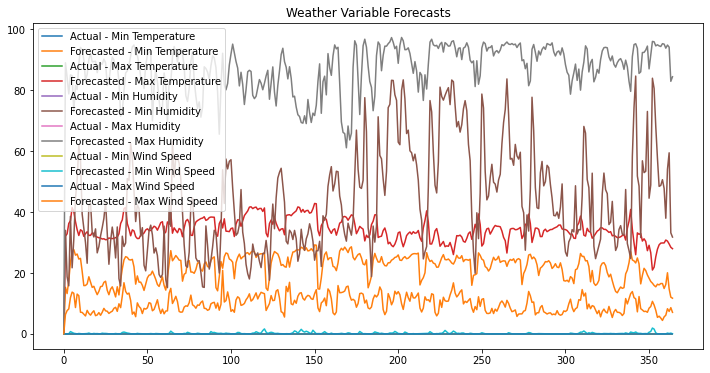

In [133]:
df_warangal = df[df['District'] == 'Warangal']

df_warangal['Date'] = pd.to_datetime(df_warangal['Date'])
df_warangal.set_index('Date', inplace=True)

# Splitting Data into Training and Testing
train_data = df_warangal['2018-01-01':'2022-12-31'].reset_index(drop=True)
test_data = df_warangal['2023-01-01':].reset_index(drop=True)


# Visualizing Data
plt.figure(figsize=(12,6))
plt.plot(train_data['temp_max (⁰C)'], label='Training Data - Max Temperature')
plt.plot(test_data['temp_max (⁰C)'], label='Testing Data - Max Temperature')
plt.plot(train_data['temp_min (⁰C)'], label='Training Data - Min Temperature')
plt.plot(test_data['temp_min (⁰C)'], label='Testing Data - Min Temperature')
plt.plot(train_data['humidity_min (%)'], label='Training Data - Min Humidity')
plt.plot(test_data['humidity_min (%)'], label='Testing Data - Min Humidity')
plt.plot(train_data['humidity_max (%)'], label='Training Data - Max Humidity')
plt.plot(test_data['humidity_max (%)'], label='Testing Data - Max Humidity')
plt.plot(train_data['wind_speed_min (Kmph)'], label='Training Data - Min Humidity')
plt.plot(test_data['wind_speed_min (Kmph)'], label='Testing Data - Min Humidity')
plt.plot(train_data['wind_speed_max (Kmph)'], label='Training Data - Max Humidity')
plt.plot(test_data['wind_speed_max (Kmph)'], label='Testing Data - Max Humidity')
plt.title('Weather Time Series Data')
plt.legend()
plt.show()

# # Determining Seasonality and Trend for Max Temperature
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['temp_max (⁰C)'], ax=ax[0], lags=40)
# plot_pacf(train_data['temp_max (⁰C)'], ax=ax[1], lags=40)
# plt.show()

# # Determining Seasonality and Trend for Min Temperature
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['temp_min (⁰C)'], ax=ax[0], lags=40)
# plot_pacf(train_data['temp_min (⁰C)'], ax=ax[1], lags=40)
# plt.show()

# # Determining Seasonality and Trend for Min Humidity
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['humidity_min (%)'], ax=ax[0], lags=40)
# plot_pacf(train_data['humidity_min (%)'], ax=ax[1], lags=40)
# plt.show()

# sns.set_style('whitegrid')
# fig, ax = plt.subplots(2,1, figsize=(12,6))
# plot_acf(train_data['Humidity_max (%)'], ax=ax[0], lags=40)
# plot_pacf(train_data['Humidity_max (%)'], ax=ax[1], lags=40)
# plt.show()

temp_min_predictions = fit_and_forecast('temp_min (⁰C)', train_data, test_data)
temp_max_predictions = fit_and_forecast('temp_max (⁰C)', train_data, test_data)
humidity_min_predictions = fit_and_forecast('humidity_min (%)', train_data, test_data)
humidity_max_predictions = fit_and_forecast('humidity_max (%)', train_data, test_data)
wind_speed_min_predictions = fit_and_forecast('wind_speed_min (Kmph)', train_data, test_data)
wind_speed_max_predictions = fit_and_forecast('wind_speed_max (Kmph)', train_data, test_data)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['temp_min (⁰C)'], label='Actual - Min Temperature')
plt.plot(test_data.index, temp_min_predictions, label='Forecasted - Min Temperature')
plt.plot(test_data.index, test_data['temp_max (⁰C)'], label='Actual - Max Temperature')
plt.plot(test_data.index, temp_max_predictions, label='Forecasted - Max Temperature')
plt.plot(test_data.index, test_data['humidity_min (%)'], label='Actual - Min Humidity')
plt.plot(test_data.index, humidity_min_predictions, label='Forecasted - Min Humidity')
plt.plot(test_data.index, test_data['humidity_max (%)'], label='Actual - Max Humidity')
plt.plot(test_data.index, humidity_max_predictions, label='Forecasted - Max Humidity')
plt.plot(test_data.index, test_data['wind_speed_min (Kmph)'], label='Actual - Min Wind Speed')
plt.plot(test_data.index, wind_speed_min_predictions, label='Forecasted - Min Wind Speed')
plt.plot(test_data.index, test_data['wind_speed_max (Kmph)'], label='Actual - Max Wind Speed')
plt.plot(test_data.index, wind_speed_max_predictions, label='Forecasted - Max Wind Speed')
plt.title('Weather Variable Forecasts')
plt.legend()
plt.show()

start_date='2023-01-01'
end_date= '2023-12-31'
predictions_df_warangal = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': 'Warangal', 'temp_min (⁰C)': temp_min_predictions,'temp_max (⁰C)':temp_max_predictions,'humidity_min (%)':humidity_min_predictions,'humidity_max (%)':humidity_max_predictions, 
                               'wind_speed_min (Kmph)':wind_speed_min_predictions,'wind_speed_max (Kmph)':wind_speed_max_predictions})
predictions_df_warangal.set_index('Date', inplace=True)

In [134]:
predictions_df_warangal = predictions_df_warangal.reset_index()
predictions_df_warangal

,Date,District,temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,2023-01-01,Warangal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-01-02,Warangal,15.283774,32.054014,33.999564,89.039573,0.000000,6.341659
2,2023-01-03,Warangal,13.229588,32.869401,18.802708,84.272778,0.016348,7.634794
3,2023-01-04,Warangal,17.519758,36.269294,15.778514,78.811928,0.008652,8.189050
4,2023-01-05,Warangal,23.500674,37.169743,38.599770,85.054808,0.746581,11.913039
...,...,...,...,...,...,...,...,...
360,2023-12-27,Warangal,16.238684,30.816042,37.978469,93.847529,0.000518,6.128370
361,2023-12-28,Warangal,20.071557,30.466557,54.060429,94.863945,0.251810,8.252307
362,2023-12-29,Warangal,14.758440,29.529341,59.470023,94.166074,0.116559,7.372435
363,2023-12-30,Warangal,12.062741,28.444134,33.179290,82.954755,0.237993,8.608685


In [135]:
predictions_df_warangal.to_csv('warangal_forecasted.csv', index=False)

# Merging all datasets into single dataframe

In [136]:
adilabad = pd.read_csv('adilabad_forecasted.csv')
nizamabad = pd.read_csv('nizamabad_forecasted.csv')
khammam = pd.read_csv('khammam_forecasted.csv')
karimnagar = pd.read_csv('karimnagar_forecasted.csv')
warangal = pd.read_csv('warangal_forecasted.csv')

In [137]:
combined_df = pd.concat([adilabad, nizamabad, khammam, karimnagar, warangal], ignore_index=True)

In [138]:
combined_df

,Date,District,temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,2023-01-01,Adilabad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-01-02,Adilabad,11.199995,30.436811,25.720988,75.483143,0.250000,9.627759
2,2023-01-03,Adilabad,12.319795,33.057700,14.234923,61.152354,0.109764,9.605300
3,2023-01-04,Adilabad,19.462281,36.441182,15.674186,48.062585,0.000003,10.917201
4,2023-01-05,Adilabad,25.624822,39.832842,9.222777,66.739904,0.046738,15.574990
...,...,...,...,...,...,...,...,...
1820,2023-12-27,Warangal,16.238684,30.816042,37.978469,93.847529,0.000518,6.128370
1821,2023-12-28,Warangal,20.071557,30.466557,54.060429,94.863945,0.251810,8.252307
1822,2023-12-29,Warangal,14.758440,29.529341,59.470023,94.166074,0.116559,7.372435
1823,2023-12-30,Warangal,12.062741,28.444134,33.179290,82.954755,0.237993,8.608685


In [139]:
combined_df.describe()

,temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,21.868334,34.366068,42.517074,84.128148,0.190042,9.808414
std,4.478050,4.163519,18.472439,12.722868,0.368031,3.596171
min,0.000000,0.000000,0.000000,0.000000,-0.113348,0.000000
25%,18.720616,32.042405,27.880367,79.136862,0.004363,7.022090
50%,23.262078,34.180986,39.138204,88.533577,0.052568,9.353159
75%,24.977959,36.592507,54.798109,93.276393,0.211710,11.898211
max,30.859574,43.578537,91.478061,98.218556,3.564359,23.704369


In [140]:
combined_df['wind_speed_min (Kmph)'] = combined_df["wind_speed_min (Kmph)"].abs()

In [141]:
col_means = combined_df.mean()

# Replace the zero values with the column mean
combined_df = combined_df.replace(0, np.nan).fillna(col_means)

/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_36203/4199524942.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  col_means = combined_df.mean()


In [142]:
combined_df

,Date,District,temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,2023-01-01,Adilabad,21.868334,34.366068,42.517074,84.128148,0.194648,9.808414
1,2023-01-02,Adilabad,11.199995,30.436811,25.720988,75.483143,0.250000,9.627759
2,2023-01-03,Adilabad,12.319795,33.057700,14.234923,61.152354,0.109764,9.605300
3,2023-01-04,Adilabad,19.462281,36.441182,15.674186,48.062585,0.000003,10.917201
4,2023-01-05,Adilabad,25.624822,39.832842,9.222777,66.739904,0.046738,15.574990
...,...,...,...,...,...,...,...,...
1820,2023-12-27,Warangal,16.238684,30.816042,37.978469,93.847529,0.000518,6.128370
1821,2023-12-28,Warangal,20.071557,30.466557,54.060429,94.863945,0.251810,8.252307
1822,2023-12-29,Warangal,14.758440,29.529341,59.470023,94.166074,0.116559,7.372435
1823,2023-12-30,Warangal,12.062741,28.444134,33.179290,82.954755,0.237993,8.608685


In [144]:
combined_df.to_csv('Weather_2023_forecasted.csv',index=False)

In [5]:
import pandas as pd
df = pd.read_csv('/home/suku/Desktop/projects/T-aims/TheScripter-s/Preprocessing/Weather/all_data.csv', index_col='Date time', parse_dates=True)

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import json
import urllib.request, urllib.parse, urllib.error
# from datetime import datetime,timedelta
from datetime import date,timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import requests
import datetime
# from datetime import date
import json

# data=pd.read_csv('forapi.csv')

# key2 = "c07a9fcaab2d950fbcc19fef00a77360"
# serviceURL = "http://api.openweathermap.org/data/2.5/air_pollution?"


In [3]:

import math


def calculate_aqi(data):
    # Calculate AQI for each pollutant
    no2_conc = data['list'][0]['components']['no2']
    O3_conc = data['list'][0]['components']['o3']
    pm25_conc = data['list'][0]['components']['pm2_5']
    pm10_conc = data['list'][0]['components']['pm10']
    so2_conc = data['list'][0]['components']['so2']
    nh3_conc = data['list'][0]['components']['nh3']
    
    aqi_so2 = calculate_aqi_pollutant(so2_conc, "SO2")
    aqi_O3 = calculate_aqi_pollutant(O3_conc, "O3")
    aqi_no2 = calculate_aqi_pollutant(no2_conc, "NO2")
    aqi_pm10 = calculate_aqi_pollutant(pm10_conc, "PM10")
    aqi_pm25 = calculate_aqi_pollutant(pm25_conc, "PM2.5")
    aqi_nh3 = calculate_aqi_pollutant(nh3_conc, "NH3")
    
    aqi_values = [aqi_so2, aqi_no2, aqi_pm25, aqi_pm10]
    pollutant_concs = [so2_conc, no2_conc, pm25_conc, pm10_conc]
    max_aqi = max(aqi_values)
    max_pollutant_conc = pollutant_concs[aqi_values.index(max_aqi)]
    max_pollutant = ""
    if aqi_values.index(max_aqi) == 0:
        max_pollutant = "SO2"
    elif aqi_values.index(max_aqi) == 1:
        max_pollutant = "NO2"
    elif aqi_values.index(max_aqi) == 2:
        max_pollutant = "PM2.5"
    elif aqi_values.index(max_aqi) == 3:
        max_pollutant = "PM10"
    # print(aqi_pm10,aqi_pm25,pm10_conc)
    aqi = {'AQI':max_aqi, "Main pollutant":max_pollutant,"value": max_pollutant_conc} 
    all = {"PM10" : pm10_conc,"PM2.5":pm25_conc,"NO2":no2_conc,"SO2":so2_conc} 
    return aqi,all


def calculate_aqi_pollutant(conc, pollutant):
# Calculate AQI for each pollutant

# Define the AQI breakpoints and corresponding values for each pollutant
# Define the AQI breakpoints and corresponding values for each pollutant
    if pollutant == "SO2":
        breakpoints = [0, 40, 80, 380, 800, 1600]
        aqi_values = 	[0, 50, 100, 200, 300, 400, 500]
    elif pollutant == "O3":
        breakpoints = 	[0, 50, 100, 168, 208, 748]
        aqi_values = [0, 50, 100, 150, 200, 300, 400]
    elif pollutant == "NO2":
        breakpoints = [0, 40, 80, 180, 280, 400]
        aqi_values = [0, 50, 100, 200, 300, 400, 500]
    elif pollutant == "PM10":
        breakpoints = [0, 50, 100, 250, 350, 430]
        aqi_values = [0, 50, 100, 150, 200, 300, 400]
    elif pollutant == "PM2.5":
        breakpoints = [0, 40, 80, 120, 250, 450]
        aqi_values = [0, 50, 100, 150, 200, 300,400]
    elif pollutant == "NH3":
        breakpoints = [0, 200, 400, 800, 1200, 1800]
        aqi_values = [0, 50, 100, 200, 300, 400, 500]
    
    
    
    
    # if pollutant == "SO2":
    #     breakpoints = 	[0, 20,40, 80, 160,400,600]
    #     aqi_values = 	[0, 50, 100 , 150, 200, 300, 500]
    # elif pollutant == "O3":
    #     breakpoints = 		[0, 20,50,100,200,400,600]
    #     aqi_values = [0, 50, 100 , 150, 200, 300, 500]
    # elif pollutant == "NO2":
    #     breakpoints = [0, 20,40, 80, 160,400,600]
    #     aqi_values = [0, 50, 100 , 150, 200, 300, 500]
    # elif pollutant == "PM10":
    #     breakpoints = [0,30,60,100,200,300,400 ]
    #     aqi_values = [0, 50, 100 , 150, 200, 300, 500]
    # elif pollutant == "PM2.5":
    #     breakpoints = [0, 20,40,60,100,200,300]
    #     aqi_values = [0, 50, 100 , 150, 200, 300, 500]
    # elif pollutant == "NH3":
    #     breakpoints = [0, 200, 400, 800, 1200, 1800]
    #     aqi_values = [0, 50, 100 , 150, 200, 300, 500]  
        
        
        
        
    # if pollutant == "SO2":
    #     breakpoints = 	[0, 40, 80, 380, 800, 1600]
    #     aqi_values = 	[0, 50, 100, 150, 200, 300, 400]
    # elif pollutant == "O3":
    #     breakpoints = 	[0, 54, 70, 85, 105, 200, 405]
    #     aqi_values = [0, 50, 100, 150, 200, 300, 400]
    # elif pollutant == "NO2":
    #     breakpoints = 	[0, 40, 80, 180, 280, 400]
    #     aqi_values = [0, 50, 100, 150, 200, 300, 400]
    # elif pollutant == "PM10":
    #     breakpoints = 	[0, 54, 154, 254, 354, 424]
    #     aqi_values = [0, 50, 100, 150, 200, 300, 400]
    # elif pollutant == "PM2.5":
    #     breakpoints = [0, 12, 35.4, 55.4, 150.4, 250.4, 350.4, 500.4]
    #     aqi_values = [0, 50, 100, 150, 200, 300, 400]
    # elif pollutant == "NH3":
    #     breakpoints = [0, 200, 400, 800, 1200, 1800]
    #     aqi_values = [0, 50, 100, 150, 200, 300, 400] 
        
        
        
        
       
    else:
        raise ValueError("Invalid pollutant type")

# Calculate the AQI for the given concentration value
    if conc <= breakpoints[0]:
        aqi = 0
    elif conc > breakpoints[-1]:
        aqi = 500
    else:
        for i in range(len(breakpoints)-1):
            if conc > breakpoints[i] and conc <= breakpoints[i+1]:
                aqi = (aqi_values[i+1] - aqi_values[i]) / (breakpoints[i+1] -  breakpoints[i]) * (conc - breakpoints[i]) + aqi_values[i]

    return math.ceil(aqi) if (aqi - math.floor(aqi)) >= 0.5 else math.floor(aqi)

In [98]:
import pandas as pd
from datetime import date, datetime, timedelta
import ast
import urllib.request

district = "Adilabad"

Data = pd.read_csv("/home/suku/Desktop/projects/T-aims/TheScripter-s/Preprocessing/AQI/AQI.csv")
yesterday = date.today() - timedelta(days=1)
yesterday_str = yesterday.strftime("%d-%m-%y")
yesterday_str = datetime.strptime(yesterday_str, "%d-%m-%y").timestamp()
yesterday_str = int(yesterday_str)
today = date.today() 
today_str = today.strftime("%d-%m-%y")
today_str = datetime.strptime(today_str, "%d-%m-%y").timestamp()
today_str = int(today_str)

dic = {"Adilabad":"{'lon': 78.5, 'lat': 19.5}", 
        "Nizamabad":"{'lon': 78.25, 'lat': 18.75}",
        "Warangal":"{'lon': 79.5971, 'lat': 17.9821}",
        "Karimnagar":"{'lon': 79.1328, 'lat': 18.4348}",
        "Khammam":"{'lon': 80.3333, 'lat': 17.5}"}

latlon = ast.literal_eval(dic[district])
lat = latlon['lat']
lon = latlon['lon']

# Construct the API URL with the required parameters
key = "c07a9fcaab2d950fbcc19fef00a77360"
serviceURL = "http://api.openweathermap.org/data/2.5/air_pollution/history?"
url = f"{serviceURL}lat={lat}&lon={lon}&start={yesterday_str}&end={today_str}&appid={key}"

# Send a request to the API URL and receive the response
# response = urllib.request.urlopen(url)


In [93]:
response = urllib.request.urlopen(url)

    # Parse the response JSON data into a dataframe    
data = json.loads(response.read().decode())
    

In [96]:
aqi_data = calculate_aqi(data)

aqi,pollutant_concentrations, = aqi_data
pc=pollutant_concentrations
df = pd.DataFrame({'Date': yesterday_str,'Location': district,'AQI': aqi["AQI"], 'NO2':pc["NO2"], 'SO2':pc["SO2"], 'PM2.5':pc["PM2.5"], 'PM10':pc["PM10"]}) 
df = pd.concat([data, df], axis=1, ignore_index=True)

ValueError: If using all scalar values, you must pass an index

In [99]:
aqi,pollutant_concentrations = aqi_data
pc = pollutant_concentrations
df = pd.DataFrame({'Date': yesterday_str,'Location': district,'AQI': aqi["AQI"], 'NO2':pc["NO2"], 'SO2':pc["SO2"], 'PM2.5':pc["PM2.5"], 'PM10':pc["PM10"]}, index=[0]) 
df = pd.concat([Data, df], axis=1, ignore_index=False)

In [101]:
data

{'coord': {'lon': 78.5, 'lat': 19.5},
 'list': [{'main': {'aqi': 4},
   'components': {'co': 447.27,
    'no': 0,
    'no2': 8.14,
    'o3': 70.81,
    'so2': 8.11,
    'pm2_5': 59.21,
    'pm10': 66.16,
    'nh3': 8.49},
   'dt': 1677697200},
  {'main': {'aqi': 4},
   'components': {'co': 447.27,
    'no': 0,
    'no2': 7.97,
    'o3': 56.51,
    'so2': 7.03,
    'pm2_5': 60.38,
    'pm10': 67.39,
    'nh3': 9.75},
   'dt': 1677700800},
  {'main': {'aqi': 4},
   'components': {'co': 453.95,
    'no': 0,
    'no2': 7.8,
    'o3': 45.42,
    'so2': 5.84,
    'pm2_5': 61.35,
    'pm10': 68.93,
    'nh3': 11.27},
   'dt': 1677704400},
  {'main': {'aqi': 4},
   'components': {'co': 453.95,
    'no': 0,
    'no2': 7.63,
    'o3': 37.55,
    'so2': 4.83,
    'pm2_5': 62.38,
    'pm10': 70.63,
    'nh3': 13.17},
   'dt': 1677708000},
  {'main': {'aqi': 4},
   'components': {'co': 460.63,
    'no': 0,
    'no2': 7.63,
    'o3': 30.76,
    'so2': 3.99,
    'pm2_5': 62.88,
    'pm10': 71.73,
   

In [1]:
import pandas as pd
import ast
from datetime import datetime
from weather_aqi import R

# Read existing data from AQI.csv file
data = pd.read_csv("AQI.csv")

# Define dictionary of district names and their corresponding lat/lon coordinates
dic = {"Adilabad": {'lon': 78.5, 'lat': 19.5}, 
       "Nizamabad": {'lon': 78.25, 'lat': 18.75},
       "Warangal": {'lon': 79.5971, 'lat': 17.9821},
       "Karimnagar": {'lon': 79.1328, 'lat': 18.4348},
       "Khammam": {'lon': 80.3333, 'lat': 17.5}}

# Loop over each district and get AQI and pollutant concentration data
for district in dic.keys():
    aqi, all_pollutants = Realtimeaqi(district)
    
    # Get latitude and longitude coordinates for current district
    latlon = dic[district]
    lat = latlon['lat']
    lon = latlon['lon']
    
    # Create dictionary of data to append to AQI.csv
    data_to_append = {"Date": datetime.today().strftime('%Y-%m-%d'),
                      "Location": district,
                      "AQI": aqi['AQI'],
                      "CO": all_pollutants.get('CO', ''),
                      "NO": all_pollutants.get('NO', ''),
                      "NO2": all_pollutants.get('NO2', ''),
                      "O3": all_pollutants.get('O3', ''),
                      "SO2": all_pollutants.get('SO2', ''),
                      "PM2.5": all_pollutants.get('PM2.5', ''),
                      "PM10": all_pollutants.get('PM10', ''),
                      "NH3": all_pollutants.get('NH3', ''),
                      "Latitude": lat,
                      "Longitude": lon}
    
    # Append data to AQI.csv file
    data = data.append(data_to_append, ignore_index=True)

# Write updated data to AQI.csv file
data.to_csv("AQI.csv", index=False)


ModuleNotFoundError: No module named 'weather_aqi'